In [ ]:
import dependencias
from dependencias.Agentes.deep_q_agent import state_function_8n, state_function_15, plot_scores_function, train_rl_agent, state_big_matrix

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: State Matrix

In [7]:

# Parámetros del agente
dqnagent = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.0005,
    input_dim=10*10,  
    hidden_dim = 128,
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints',
    state_function=state_big_matrix    
)
game = dependencias.Snake_game((10, 10), 1, dqnagent)

In [8]:
state_big_matrix(game.state)

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.])

<Figure size 640x480 with 0 Axes>

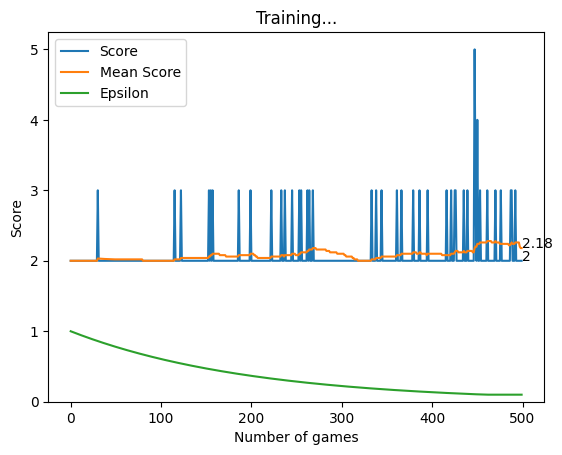

In [9]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

train_rl_agent(500, 500, game, dqnagent,state_big_matrix , n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)


# Agente de Reinforcement Learning con modelo de Deep Q-Networks combinado con Convolutional Neural-Networks.
## State: State Matrix

In [2]:
import dependencias

dqnagentcnn = dependencias.Agentes.DQNAgentCNN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.001,
    learning_rate=0.001,
    input_channels=4,        # Número de canales: 4 (espacio libre, cuerpo, cabeza, comida)
    grid_size=(10, 10),       # Tamaño de la matriz del estado
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints'
)
# Inicializar el juego Snake
game = dependencias.Snake_game((10, 10), 1, dqnagentcnn)

In [3]:
n_games = 0
total_score = 0
plot_scores = []
plot_mean_scores = []

In [7]:
episodes = 10000
save_every = 500
import numpy as np
for e in range(0, episodes+1):
    n_games += 1
    state = game.state
    # No aplanar el estado, mantener la forma (canales, height, width)
    state_matrix = state.state_matrix()
    done = False
    
    while not done:
        # Elegir acción
        action_game = dqnagentcnn.get_action(state)
        action_mem = dqnagentcnn.get_action_mem(action_game)
        
        # Realizar acción
        game.state.update(action_game)
        next_state = game.state
        
        # Recompensa
        if game.state.is_game_over:
            reward = -10
        elif game.state.ate_food == True:
            reward = 10
        else:
            reward = 0
        
        # Guardar transición
        next_state_matrix = next_state.state_matrix()
        dqnagentcnn.store_transition(state_matrix, action_mem, reward, next_state_matrix, game.state.is_game_over)
        state_matrix = next_state_matrix
        
        # Entrenar agente
        loss = None
        if len(dqnagentcnn.memory) >= dqnagentcnn.batch_size:
            loss = dqnagentcnn.train()
            
        if game.state.is_game_over:
            # Crear estadísticas para plotearlas.
            score = len(game.state.snake)
            plot_scores.append(score)
            if n_games >= 50:
                mean_score = np.sum(plot_scores[-50:]) / 50
                plot_mean_scores.append(mean_score)
            else:
                total_score += score
                mean_score = total_score / n_games
                plot_mean_scores.append(mean_score)
            
            print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {dqnagentcnn.epsilon:.4f}")
            
            # Actualizar epsilon para exploración-explotación.
            dqnagentcnn.update_epsilon()
            
            # Save Checkpoint
            if e % save_every == 0:
                dqnagentcnn.save_checkpoint(e, mean_score)
            
            game.state.reset()
            done = True
            
        if e % 200 == 0:
            game.play_with_pygame()
            dqnagentcnn.epsilon = 0.3 # Reset epsilon para fomentar la exploración durante la visualización


Episode: 0/10000, Score: 2, Epsilon: 0.3000
Checkpoint saved at Episode 0 with Mean Score 1.40


KeyboardInterrupt: 

: 

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: 8 Neuronas
En este caso 4 neuronas son de si tiene peligro inmediato en las 4 casillas de alrededor y 4 neuronas para decir en qué dirección está la comida.


In [1]:
dqnagent8n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.001,
    input_dim=8,          # Updated input_dim
    hidden_dim=128,
    n_actions=4,      
    batch_size=128,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints',
    state_function=state_function_8n
)
game = dependencias.Snake_game((10, 10), 1, dqnagent8n)

NameError: name 'dependencias' is not defined

In [8]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

In [ ]:
train_rl_agent(10000, 500, game, dqnagent8n, state_function_8n, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: 15 Neuronas



In [ ]:
import dependencias
from dependencias.Agentes.deep_q_agent import state_function_8n, state_function_15, state_big_matrix
dqnagent15n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.0005,
    input_dim=15,          # Updated input_dim
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,
    mem_size=50000,
    target_update_freq=100,
    checkpoint_dir='checkpoints',
    state_function=state_big_matrix
)
game = dependencias.Snake_game((10, 10), 1, dqnagent15n)

In [4]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

<Figure size 640x480 with 0 Axes>

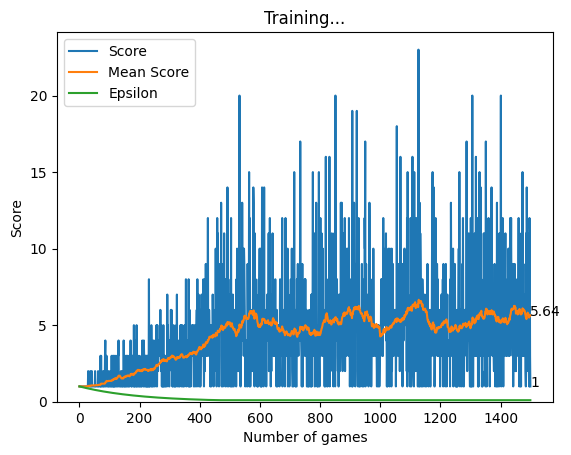

Episode: 1501/20000, Score: 1, Epsilon: 0.1
Episode: 1502/20000, Score: 1, Epsilon: 0.1
Episode: 1503/20000, Score: 14, Epsilon: 0.1
Episode: 1504/20000, Score: 1, Epsilon: 0.1
Episode: 1505/20000, Score: 1, Epsilon: 0.1
Episode: 1506/20000, Score: 5, Epsilon: 0.1


KeyboardInterrupt: 

In [5]:
train_rl_agent(20000, 500, game, dqnagent15n, state_function_15, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

# Prueba

In [5]:

load_dqnagent = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.025,          # Valor mínimo de epsilon ajustado a 0.025
    epsilon_decay=0.995,        # Decaimiento más lento
    learning_rate=0.0005,       # Tasa de aprendizaje ajustada
    input_dim=15,               # Actualizado según la nueva representación del estado
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,             # Aumentado de 64 a 128
    mem_size=50000,             # Aumentado de 10000 a 50000
    target_update_freq=1000,    # Actualizado para coincidir con el scheduler
    checkpoint_dir='checkpoints',
    state_function=state_function_15
)

# Ruta al checkpoint que deseas cargar
checkpoint_path = 'checkpoints/dqn15N_ep1500_sc5.64.pth'

load_dqnagent.load_checkpoint(checkpoint_path)
load_dqnagent.epsilon = 0.001
game = dependencias.Snake_game((15, 15), 1, load_dqnagent)

Checkpoint loaded from Episode 1500 with Mean Score 5.64


c:\Users\Usuario\Documents\GitHub\practica_3_ALN\dependencias\Agentes\deep_q_agent_8_neurons.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ch

In [3]:
game.play_with_pygame()

In [24]:
game.evaluar(n_partidas=1000)


100%|██████████| 1000/1000 [01:13<00:00, 13.65it/s]


{'puntuacion_media': 13.037,
 'puntuacion_maxima': 21,
 'puntuacion_minima': 4,
 'movimientos_medios': 249.696,
 'movimientos_mediana': 68.0,
 'movimientos_maximos': 7767,
 'movimientos_minimos': 8,
 'movimientos por puntuacion': 19.152872593388047}